In [1]:
import numpy as np
from matplotlib import pyplot as plt
from EFBP import EFBPSim, minimize_squared_error

rng = np.random.default_rng(444)

How can we make the system evolve so that it will oscillate around the threshold?  Hunches from stuff:

- Fewer strategies means larger oscillations for fixed memory and threshold.
- More strategies means lower fixed point.
- More memory means smaller oscillations.
- More memory means lower fixed point.

Is more memory equivalent to fewer strategies at some exchange rate?

Test
# Number of strategies

Simulation s100m2t0.6 has std 235.10635891017495
Simulation s50m2t0.6 has std 235.10635891017495
Simulation s10m2t0.6 has std 216.5109445270608
Simulation s5m2t0.6 has std 131.74856773415036
Simulation s2m2t0.6 has std 16.33800477414547


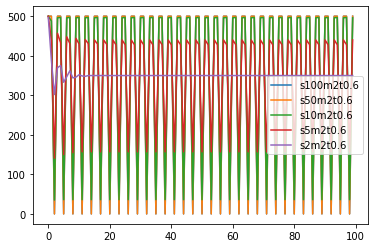

In [2]:
sims = dict()

agents = 500
m = 2
n_iter = 100
t = 0.6

strategies = [100, 50, 10, 5, 2]

h = rng.choice(agents + 1, size=2*m)

for s in strategies:
    key = f"s{s}m{m}t{t}"

    sims[key] = EFBPSim(
        memory=m, 
        strategies=s,
        threshold=t * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        best_strat_func=minimize_squared_error,
        seed=rng.choice(10000)
    )
    
for title, sim in sims.items():
    print(f"Simulation {title} has std {sim.hist[-300:].std()}")
    plt.plot(sim.hist[-300:], label=title)
    
plt.legend()

Simulation s100m10t0.6 has std 191.18850837153715
Simulation s50m10t0.6 has std 86.5192222700957
Simulation s10m10t0.6 has std 14.838341851058996
Simulation s5m10t0.6 has std 3.0305316731923826
Simulation s2m10t0.6 has std 0.5259805657584276


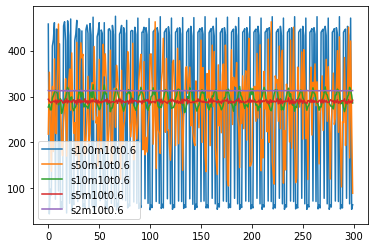

In [3]:
sims = dict()

agents = 500
m = 10
n_iter = 500
t = 0.6

strategies = [100, 50, 10, 5, 2]

h = rng.choice(agents + 1, size=2*m)

for s in strategies:
    key = f"s{s}m{m}t{t}"

    sims[key] = EFBPSim(
        memory=m, 
        strategies=s,
        threshold=t * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        best_strat_func=minimize_squared_error,
        seed=rng.choice(10000)
    )
    
for title, sim in sims.items():
    print(f"Simulation {title} has std {sim.hist[-300:].std()}")
    plt.plot(sim.hist[-300:], label=title)
    
plt.legend()

Simulation s100m30t0.6 has std 16.80154622514117
Simulation s50m30t0.6 has std 12.517885426682717
Simulation s10m30t0.6 has std 7.841343422313976
Simulation s5m30t0.6 has std 1.4223415748530857
Simulation s2m30t0.6 has std 1.1089284116759848


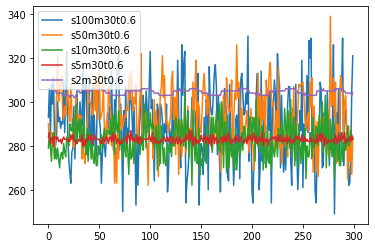

In [4]:
sims = dict()

agents = 500
m = 30
n_iter = 500
t = 0.6

strategies = [100, 50, 10, 5, 2]

h = rng.choice(agents + 1, size=2*m)

for s in strategies:
    key = f"s{s}m{m}t{t}"

    sims[key] = EFBPSim(
        memory=m, 
        strategies=s,
        threshold=t * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        best_strat_func=minimize_squared_error,
        seed=rng.choice(10000)
    )
    
for title, sim in sims.items():
    print(f"Simulation {title} has std {sim.hist[-300:].std()}")
    plt.plot(sim.hist[-300:], label=title)
    
plt.legend()

Simulation s100m10t0.2 has std 111.72843440931031
Simulation s50m10t0.2 has std 91.6828480263469
Simulation s10m10t0.2 has std 20.778962651896002
Simulation s5m10t0.2 has std 3.2752862470324633
Simulation s2m10t0.2 has std 0.0


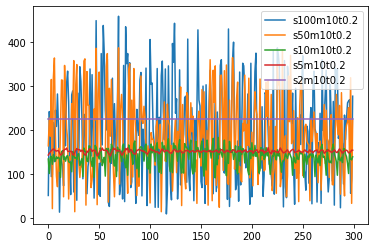

In [5]:
sims = dict()

agents = 500
m = 10
n_iter = 500
t = 0.2

strategies = [100, 50, 10, 5, 2]

h = rng.choice(agents + 1, size=2*m)

for s in strategies:
    key = f"s{s}m{m}t{t}"

    sims[key] = EFBPSim(
        memory=m, 
        strategies=s,
        threshold=t * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        best_strat_func=minimize_squared_error,
        seed=rng.choice(10000)
    )
    
for title, sim in sims.items():
    print(f"Simulation {title} has std {sim.hist[-300:].std()}")
    plt.plot(sim.hist[-300:], label=title)
    
plt.legend()

Simulation s100m10t0.2 has std 198.01776856299202
Simulation s50m10t0.2 has std 141.61634694562002
Simulation s10m10t0.2 has std 17.10740288101421
Simulation s5m10t0.2 has std 2.9892009337316585
Simulation s2m10t0.2 has std 0.9821518325708211


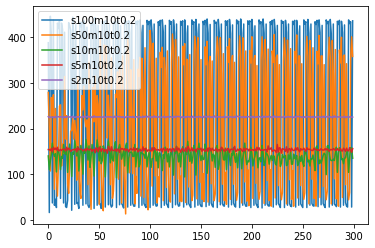

In [6]:
sims = dict()

agents = 500
m = 10
n_iter = 500
t = 0.2

strategies = [100, 50, 10, 5, 2]

h = rng.choice(agents + 1, size=2*m)

for s in strategies:
    key = f"s{s}m{m}t{t}"

    sims[key] = EFBPSim(
        memory=m, 
        strategies=s,
        threshold=t * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        best_strat_func=minimize_squared_error,
        seed=rng.choice(10000)
    )
    
for title, sim in sims.items():
    print(f"Simulation {title} has std {sim.hist[-300:].std()}")
    plt.plot(sim.hist[-300:], label=title)
    
plt.legend()

Okay, we definitely see larger oscillations as the number of strategies grow.  It's hard to speculate about the location of the fixed point where oscillations are small but it seems plausible that more strategies decrease the fixed point.  How about

## Memory

Simulation s2m100t0.6 has std 8.135010755985514
Simulation s2m50t0.6 has std 6.81102048154313
Simulation s2m10t0.6 has std 10.028459502834918
Simulation s2m5t0.6 has std 7.300027397208862
Simulation s2m2t0.6 has std 1.4069825869569248


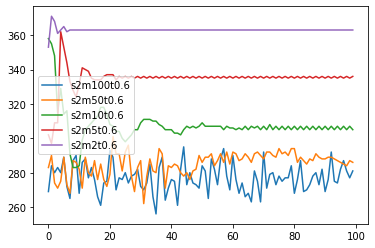

In [7]:
sims = dict()

agents = 500
s = 2
n_iter = 100
t = 0.6

memories = [100, 50, 10, 5, 2]


for m in memories:
    key = f"s{s}m{m}t{t}"
    h = rng.choice(agents + 1, size=2*m)

    sims[key] = EFBPSim(
        memory=m, 
        strategies=s,
        threshold=t * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        best_strat_func=minimize_squared_error,
        seed=rng.choice(10000)
    )
    
for title, sim in sims.items():
    print(f"Simulation {title} has std {sim.hist[-300:].std()}")
    plt.plot(sim.hist[-300:], label=title)
    
plt.legend()

Simulation s10m100t0.6 has std 12.360355981928675
Simulation s10m50t0.6 has std 16.990456144553622
Simulation s10m10t0.6 has std 19.680678341967788
Simulation s10m5t0.6 has std 106.01867759975126
Simulation s10m2t0.6 has std 217.71952232172475


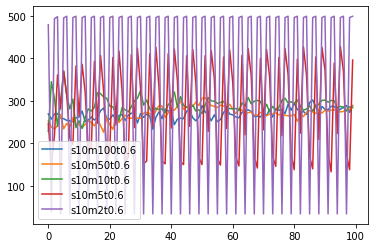

In [8]:
sims = dict()

agents = 500
s = 10
n_iter = 100
t = 0.6

memories = [100, 50, 10, 5, 2]


for m in memories:
    key = f"s{s}m{m}t{t}"
    h = rng.choice(agents + 1, size=2*m)

    sims[key] = EFBPSim(
        memory=m, 
        strategies=s,
        threshold=t * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        best_strat_func=minimize_squared_error,
        seed=rng.choice(10000)
    )
    
for title, sim in sims.items():
    print(f"Simulation {title} has std {sim.hist[-300:].std()}")
    plt.plot(sim.hist[-300:], label=title)
    
plt.legend()

Simulation s10m10t0.6 has std 9.070241942136322
Simulation s10m50t0.6 has std 4.231621701218367
Simulation s10m100t0.6 has std 6.009747637519122


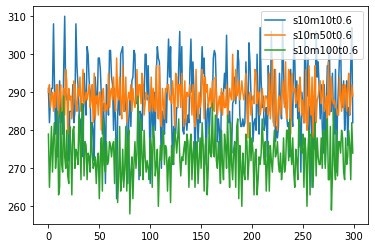

In [9]:
sims = dict()

agents = 500
s = 10
n_iter = 800
t = 0.6

memories = [10, 50, 100]


for m in memories:
    key = f"s{s}m{m}t{t}"
    h = rng.choice(agents + 1, size=2*m)

    sims[key] = EFBPSim(
        memory=m, 
        strategies=s,
        threshold=t * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        best_strat_func=minimize_squared_error,
        seed=rng.choice(10000)
    )
    
for title, sim in sims.items():
    print(f"Simulation {title} has std {sim.hist[-300:].std()}")
    plt.plot(sim.hist[-300:], label=title)
    
plt.legend()

Simulation s10m10t0.2 has std 17.01124432054673
Simulation s10m50t0.2 has std 7.506705150878262
Simulation s10m100t0.2 has std 6.319722216117484


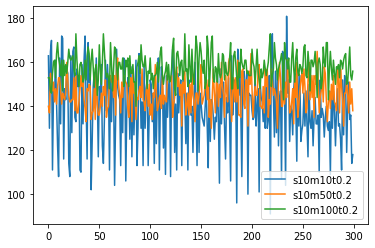

In [10]:
sims = dict()

agents = 500
s = 10
n_iter = 800
t = 0.2

memories = [10, 50, 100]


for m in memories:
    key = f"s{s}m{m}t{t}"
    h = rng.choice(agents + 1, size=2*m)

    sims[key] = EFBPSim(
        memory=m, 
        strategies=s,
        threshold=t * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        best_strat_func=minimize_squared_error,
        seed=rng.choice(10000)
    )
    
for title, sim in sims.items():
    print(f"Simulation {title} has std {sim.hist[-300:].std()}")
    plt.plot(sim.hist[-300:], label=title)
    
plt.legend()

Simulation s10m10t0.8 has std 0.0
Simulation s10m50t0.8 has std 3.0477678535099892
Simulation s10m100t0.8 has std 2.739675568789528


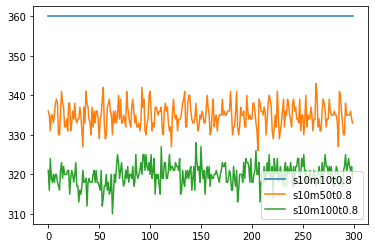

In [11]:
sims = dict()

agents = 500
s = 10
n_iter = 800
t = 0.8

memories = [10, 50, 100]


for m in memories:
    key = f"s{s}m{m}t{t}"
    h = rng.choice(agents + 1, size=2*m)

    sims[key] = EFBPSim(
        memory=m, 
        strategies=s,
        threshold=t * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        best_strat_func=minimize_squared_error,
        seed=rng.choice(10000)
    )
    
for title, sim in sims.items():
    print(f"Simulation {title} has std {sim.hist[-300:].std()}")
    plt.plot(sim.hist[-300:], label=title)
    
plt.legend()

Increasing the memory does seem to generally decrease the size of fluctuations, but not consistently.  And more memory seems to push the fixed point closer to the middle, while less memory pushes toward the threshold...

Can I 
# try manually evolving

Simulation has std 9.250643220879292


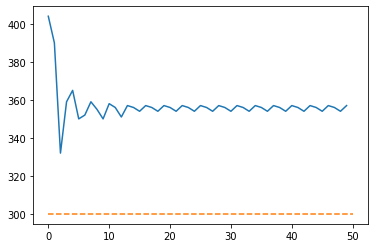

In [16]:
agents = 500
s = 2
m=2
n_iter = 50
t = 0.6



h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)
    

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, n_iter], [t*agents, t*agents], "--")

Fixed point is above threshold.  We can't decrease strategies so we increase memory.

Simulation has std 5.284846260772398


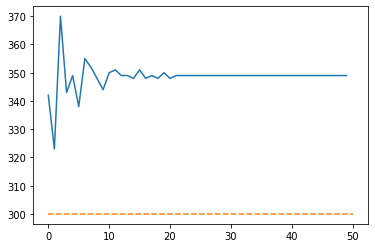

In [17]:
agents = 500
s = 2
m=3
n_iter = 50
t = 0.6



h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)
    

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, n_iter], [t*agents, t*agents], "--")

Simulation has std 8.024985981296165


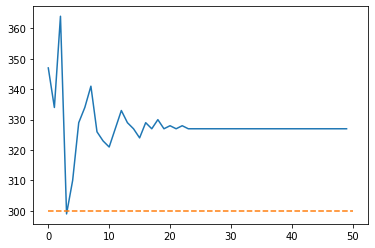

In [18]:
agents = 500
s = 2
m=4
n_iter = 50
t = 0.6



h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)
    

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, n_iter], [t*agents, t*agents], "--")

Simulation has std 7.0301066848234965


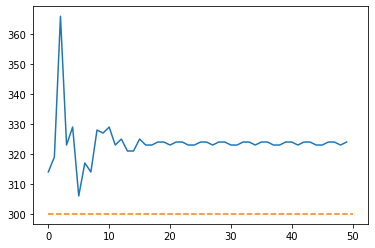

In [19]:
agents = 500
s = 2
m=5
n_iter = 50
t = 0.6



h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)
    

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, n_iter], [t*agents, t*agents], "--")

Simulation has std 9.493597842756982


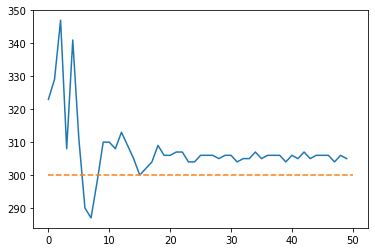

In [20]:
agents = 500
s = 2
m=6
n_iter = 50
t = 0.6



h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)
    

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, n_iter], [t*agents, t*agents], "--")

Simulation has std 15.396428157205811


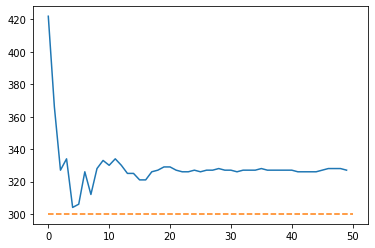

In [21]:
agents = 500
s = 2
m=7
n_iter = 50
t = 0.6



h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)
    

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, n_iter], [t*agents, t*agents], "--")

Simulation has std 7.088130924298732


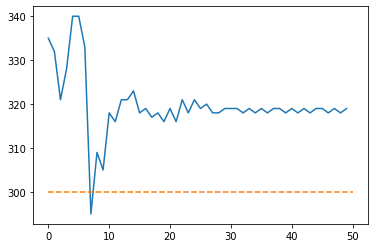

In [62]:
agents = 500
s = 2
m=7
n_iter = 50
t = 0.6



h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)
    

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, n_iter], [t*agents, t*agents], "--")

It was decreasing buut now it's getting farther away!  Increase strategies and then keep decreasing memory?

Simulation has std 22.65717546385692


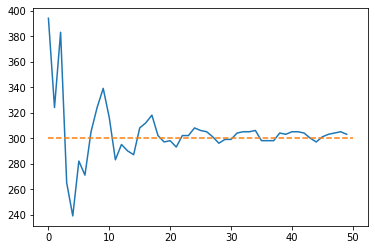

In [22]:
agents = 500
s = 3
m=6
n_iter = 50
t = 0.6



h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)
    

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, n_iter], [t*agents, t*agents], "--")

Simulation has std 1.6413375304576718


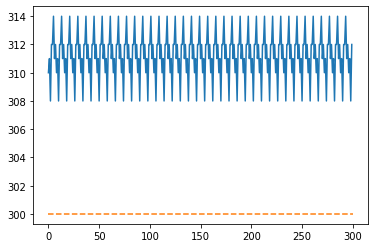

In [24]:
agents = 500
s = 3
m=6
n_iter = 500
t = 0.6



h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)
    

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter,300)], [t*agents, t*agents], "--")

Simulation has std 9.693491373081217


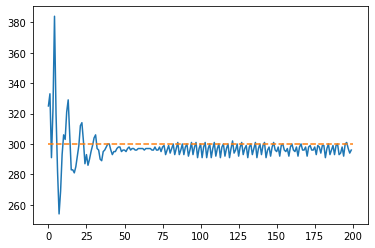

In [27]:
agents = 500
s = 3
m=7
n_iter = 200
t = 0.6



h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)
    

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter,300)], [t*agents, t*agents], "--")

This is actually about as optimal as you can get since it's consistently close to the threshold but below.  

Can we make it oscillate though?

Simulation has std 11.94382581085307


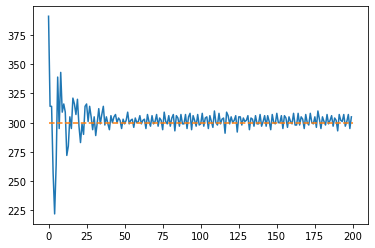

In [28]:
agents = 500
s = 4
m=7
n_iter = 200
t = 0.6

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)
    

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter,300)], [t*agents, t*agents], "--")

Simulation has std 4.764868833451767


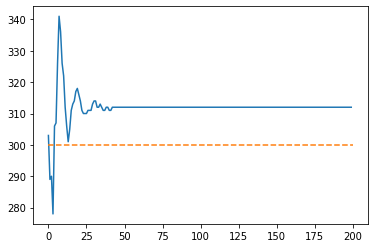

In [29]:
agents = 500
s = 2
m=7
n_iter = 200
t = 0.6



h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)
    

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter,300)], [t*agents, t*agents], "--")

So at $m=7$, both adding and removing a strategy increase attendance.  But adding is better.

Can we solve for these fixed points in Mathematica?  This might be just on the edge of manageable.

Simulation has std 8.789652375884321


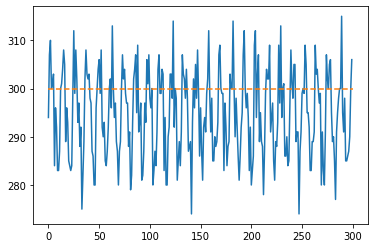

In [33]:
agents = 500
s = 10
m = 10
n_iter = 400
t = 0.6

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)
    

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

What can we do with this?  It honestly works pretty well but we could try too make the fluctuations smaller I guess?

Simulation has std 17.04885919937167


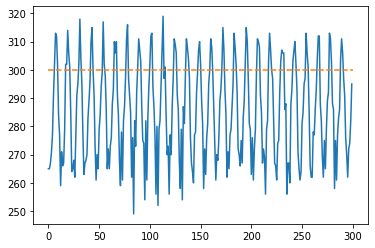

In [34]:
agents = 500
s = 9
m = 10
n_iter = 400
t = 0.6

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)
    

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

This appears to have made it worse.  What if we had MORE strategies?

Simulation has std 9.550922584872218


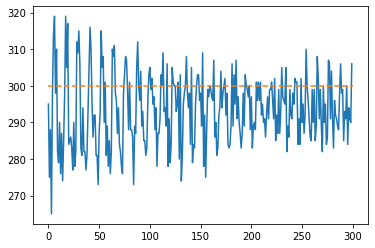

In [35]:
agents = 500
s = 11
m = 10
n_iter = 400
t = 0.6

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)
    

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

Is this better?  Not sure...  It seems to take longer to settle into a similar cycle.  Let's try fiddling with memory just for fun.

Simulation has std 6.092344923481161


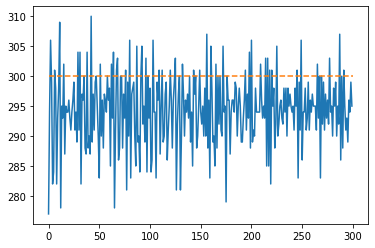

In [36]:
agents = 500
s = 10
m = 11
n_iter = 400
t = 0.6

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

Simulation has std 15.87390416165265


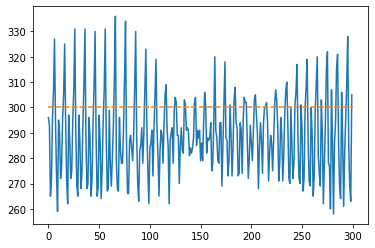

In [37]:
agents = 500
s = 10
m = 9
n_iter = 400
t = 0.6

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)
    

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

Okay, well decreasing memory definitely makes things worse...

Simulation has std 4.115612550601267


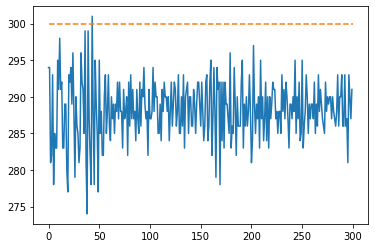

In [38]:
agents = 500
s = 11
m = 11
n_iter = 400
t = 0.6

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

Okay, so we seem to have started in some kind of local optimum where doing anything makes things worse...  What if we start somewhere else?

Simulation has std 105.02972066145001


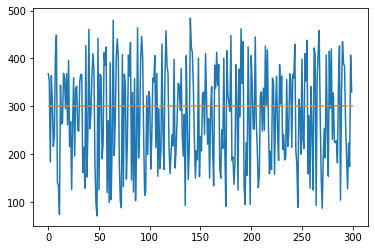

In [39]:
agents = 500
s = 100
m = 11
n_iter = 400
t = 0.6

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

Simulation has std 99.52414358112084


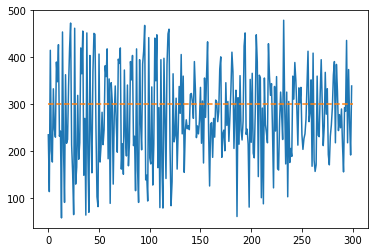

In [41]:
agents = 500
s = 95
m = 11
n_iter = 400
t = 0.6

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

Simulation has std 108.24275695552721


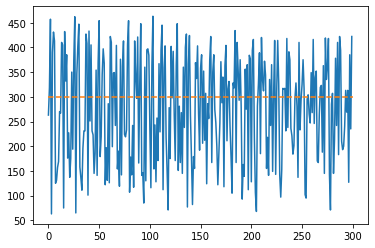

In [42]:
agents = 500
s = 90
m = 11
n_iter = 400
t = 0.6

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

Simulation has std 91.37395757119324


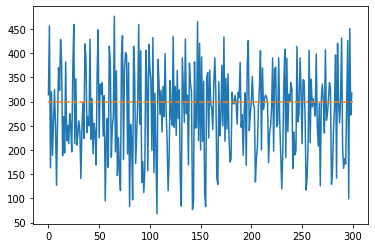

In [44]:
agents = 500
s = 80
m = 11
n_iter = 800
t = 0.6

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

Simulation has std 83.90912405692244


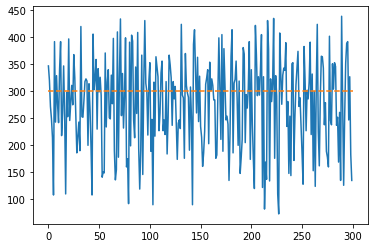

In [45]:
agents = 500
s = 70
m = 11
n_iter = 800
t = 0.6

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

Simulation has std 47.858770936533205


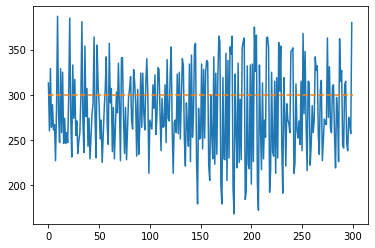

In [46]:
agents = 500
s = 30
m = 11
n_iter = 800
t = 0.6

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

Simulation has std 14.852029790196653


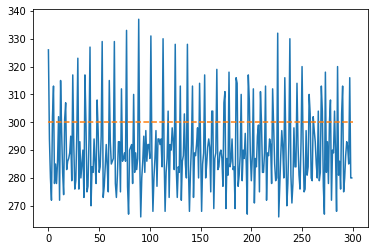

In [47]:
agents = 500
s = 20
m = 11
n_iter = 800
t = 0.6

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

Simulation has std 15.381902786499898


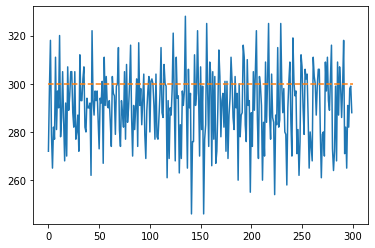

In [48]:
agents = 500
s = 19
m = 11
n_iter = 800
t = 0.6

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

Simulation has std 11.822244099812673


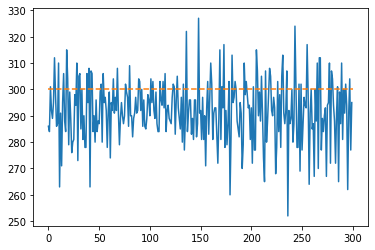

In [51]:
agents = 500
s = 18
m = 11
n_iter = 800
t = 0.6

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

Simulation has std 11.86622611541775


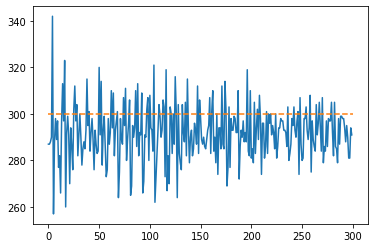

In [50]:
agents = 500
s = 17
m = 11
n_iter = 800
t = 0.6

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

This is getting below the threshold now.  Can we change memory? 

Simulation has std 26.564800436333456


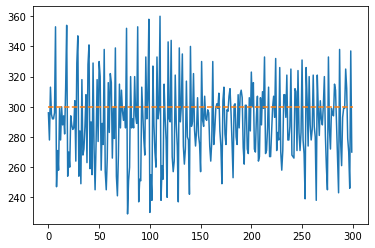

In [52]:
agents = 500
s = 17
m = 10
n_iter = 800
t = 0.6

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

This seems to move the middle up but fluctuations grow.

Simulation has std 14.472893821055814


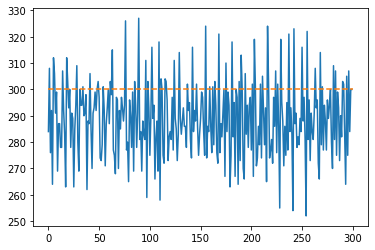

In [54]:
agents = 500
s = 17
m = 12
n_iter = 800
t = 0.6

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

Simulation has std 7.784242630682405


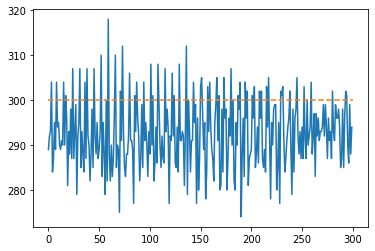

In [55]:
agents = 500
s = 17
m = 13
n_iter = 800
t = 0.6

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

I dunno... looks like we're stuck again.  Let's try a different threshold.

Simulation has std 32.18790248939292


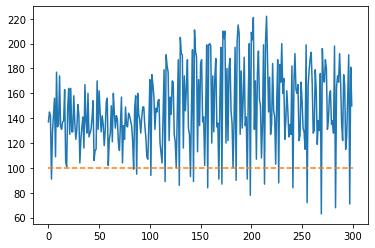

In [56]:
agents = 500
s = 17
m = 13
n_iter = 500
t = 0.2

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

Simulation has std 19.34629766475574


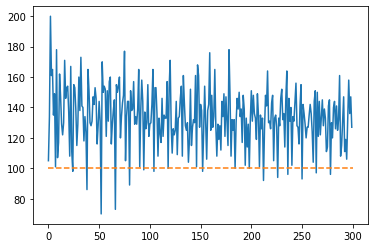

In [58]:
agents = 500
s = 16
m = 13
n_iter = 800
t = 0.2

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

Simulation has std 19.629276321069224


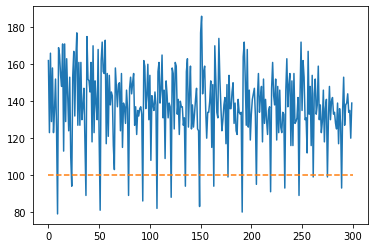

In [59]:
agents = 500
s = 15
m = 13
n_iter = 800
t = 0.2

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

Simulation has std 21.64486364526749


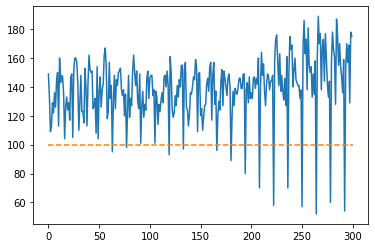

In [60]:
agents = 500
s = 14
m = 13
n_iter = 800
t = 0.2

h = rng.choice(agents + 1, size=2*m)

sim = EFBPSim(
    memory=m, 
    strategies=s,
    threshold=t * agents,
    start=h, 
    n_iter=n_iter,
    agents=agents,
    distribution="uniform",
    best_strat_func=minimize_squared_error,
    seed=rng.choice(10000)
)

print(f"Simulation has std {sim.hist[-300:].std()}")
plt.plot(sim.hist[-300:], label=title)
plt.plot([0, min(n_iter, 300)], [t*agents, t*agents], "--")

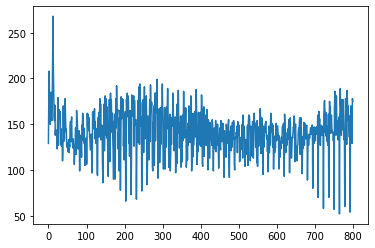

In [61]:
plt.plot(sim.hist, label=title)